<a href="https://colab.research.google.com/github/megaramatikaputri/Praktikum-ADW/blob/main/Tugas2_Kecenderungan_Deret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kecenderungan dalam Deret Waktu

Misalkan suatu deret waktu memiliki fungsi nilaitengah konstan. Model untuk deret waktu tersebut dapat dituliskan sebagai berikut:

$Y_t=\mu_t+X_t$

dengan $E(X_t)=0$ untuk semua $t$.

## Kecenderungan Linear

Deret dikatakan memiliki kecenderungan linear dalam waktu jika $\mu_t$ dapat dinyatakan sebagai:

$\mu_t=\beta_0+\beta_1t$

Berikut simulasi deret yang memiliki kecenderungan linear dalam waktu.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:
# membangkitkan data waktu dalam bentuk array (misalnya, 100 bulan)
np.random.seed(3001)
n=100
t = np.arange(n)

# Membuat deret dengan kecenderungan linear
beta1 = 0.5
beta0 = 10
deret = beta0 + beta1*t

# Menambahkan ingar acak
noise = np.random.normal(scale=2, size=n)  # Noise dengan standar deviasi 2
time_series = deret + noise  # Menggabungkan tren dengan noise

# Membuat DataFrame untuk menyimpan data
df = pd.DataFrame({"Time": pd.date_range(start="2017-01-01", periods=100, freq="M"),
                   "Value": time_series})


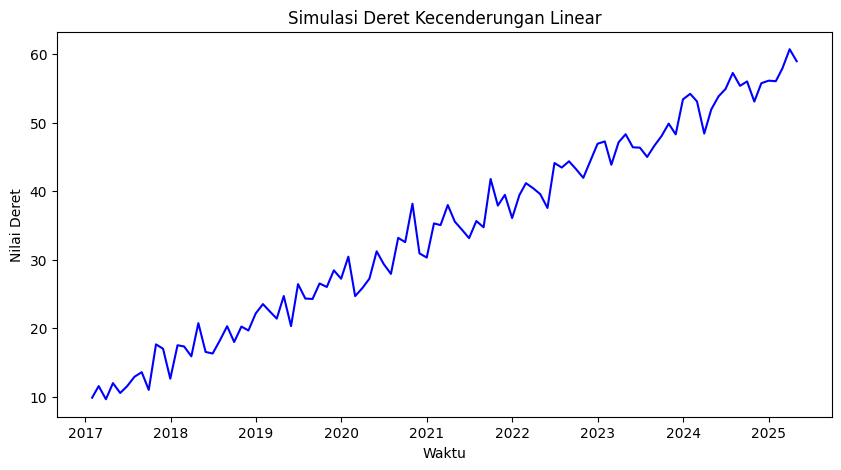

In [ ]:
# Plot deret waktu dengan tren linear
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["Value"], color="b")
plt.xlabel("Waktu")
plt.ylabel("Nilai Deret")
plt.title("Simulasi Deret Kecenderungan Linear")
plt.show()

Cek apakah ada korelasi antar pengamatan?
Plot menunjukkan tren naik yang jelas, menandakan adanya hubungan antar pengamatan

In [ ]:
# Konversi kolom Time menjadi angka (misalnya jumlah bulan sejak periode pertama)
df["Time_Numeric"] = (df["Time"].dt.to_period("M") - df["Time"].dt.to_period("M").min()).apply(lambda x: x.n)

# Hitung korelasi antara Time_Numeric dan Value
correlation = df["Time_Numeric"].corr(df["Value"])

print(f"Nilai korelasi antara Time dan Value: {correlation:.4f}")

Nilai korelasi antara Time dan Value: 0.9908


In [ ]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X = df["Time_Numeric"]
Y = df["Value"]

#memanggil package statsmodels
import statsmodels.api as sm

# Tambahkan konstanta (intercept) ke model regresi
X = sm.add_constant(X)

# Buat dan jalankan model regresi
model = sm.OLS(Y, X).fit()

# menampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5258.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           5.85e-87
Time:                        04:19:50   Log-Likelihood:                -208.21
No. Observations:                 100   AIC:                             420.4
Df Residuals:                      98   BIC:                             425.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.9308      0.389     25.517   

Bagaimana hasil pengepasan model regresi dibandingkan dengan nilai parameter asli?
Berdasarkan tabel ringkasan bisa dilihat:
1. Kualitas model
*  R-squared = 0.982 --> model mampu menjelaskan 98.2% variabilitas data
*  Adjusted R-Squared = 0.982 --> koreksi terhadap jumlah variabel bebas, tetap tinggi

2. Koefisien dan statistiknya
*   Intercept (const). Intercept (const) = 9.9308, Ini berarti ketika waktu (t) = 0, nilai prediksi y adalah 9.9308.Jika regresi dilakukan dengan skala waktu yang dimulai dari 1 (bukan dari 0), maka intercept bisa lebih tinggi dibanding sebelumnya.
*   Koefisien Time_numeric. Koefisien Time_numeric = 0.4925, artinya: setiap kenaikan 1 unit waktu (t), nilai y akan bertambah sebesar 0.4925.

3. Standard Error
*   Intercept SE = 0.389, menunjukkan tingkat ketidakpastian dalam estimasi nilai intercept (9.9308). Makin kecil SE, makin akurat estimasi intercept.
*   Time_numeric SE = 0.007,menunjukkan seberapa bervariasi estimasi koefisien slope (0.4925) jika sampel berubah. SE yang kecil menunjukkan bahwa estimasi slope sangat presisi dan tidak banyak variasi. Standard error yang rendah untuk Time_numeric (0.007) menunjukkan bahwa hubungan antara waktu dan nilai y sangat stabil dan tidak banyak variasi dalam estimasinya.

4. t statistik dan p-value
*   t-statistik yang sangat besar. Nilai t yang tinggi menunjukkan bahwa kedua koefisien berbeda secara signifikan dari nol.Time_Numeric memiliki nilai t yang lebih besar (72.511), artinya waktu sangat berpengaruh terhadap variabel dependen.
*   p-value = 0.000, berarti ada bukti sangat kuat untuk menolak hipotesis nol (H₀: koefisien = 0).Dengan kata lain, Intercept dan Time_Numeric sangat signifikan dalam model regresi.

Model regresi ini sangat kuat dalam menjelaskan hubungan antara waktu dan variabel dependen. Perubahan kecil pada waktu memiliki dampak yang sangat jelas pada hasil model.

5. Omnibus & Prob(Omnibus): untuk menguji apakah residual berdistribusi normal. Omnibus = 0.805, Prob(Omnibus) = 0.669: Prob(Omnibus) lebih besar dari 0.05 → Tidak ada bukti signifikan bahwa residual menyimpang dari distribusi normal. Jika nilai ini di bawah 0.05, maka ada indikasi residual tidak normal.

6. Jarque-Bera (JB) & Prob(JB): untuk Uji normalitas residual berdasarkan skewness dan kurtosis.JB = 0.759, Prob(JB) = 0.684: Prob(JB) lebih besar dari 0.05 → Tidak ada bukti bahwa residual tidak normal. Jika Prob(JB) di bawah 0.05, maka residual kemungkinan besar tidak normal. Hasil ini konsisten dengan uji Omnibus, menunjukkan bahwa asumsi normalitas residual terpenuhi.

7. Skew & Kurtosis: untuk mengukur simetri dan ketajaman distribusi residual. Skew = 0.207 → Mengukur kecondongan distribusi.
Jika mendekati 0, maka distribusi residual simetris (baik).
Jika terlalu jauh dari 0, berarti ada skewness (buruk untuk regresi). Kurtosis = 2.899 → Mengukur apakah distribusi lebih runcing atau lebih datar dibanding distribusi normal (kurtosis normal = 3).
Mendekati 3 → Residual memiliki bentuk distribusi normal (baik). Hasil ini menunjukkan bahwa residual cukup normal, karena skew mendekati 0 dan kurtosis mendekati 3.

8. Durbin-Watson (DW): untuk menguji autokorelasi residual (penting untuk time series atau data yang bergantung pada urutan). DW = 2.068: Jika DW ≈ 2, maka tidak ada autokorelasi (baik).
Jika DW < 2, ada autokorelasi positif (residual cenderung mengikuti pola).
Jika DW > 2, ada autokorelasi negatif.Karena DW ≈ 2, tidak ada masalah autokorelasi residual dalam model ini.

9. Condition Number (Cond. No.): untuk mengukur multikolinearitas (hubungan kuat antar variabel independen). Cond. No. = 114 : Jika Cond. No. < 30, tidak ada multikolinearitas (baik).
Jika Cond. No. > 100, ada potensi multikolinearitas.
Jika Cond. No. > 1000, ada masalah serius dalam multikolinearitas.Nilai 114 menunjukkan ada sedikit multikolinearitas, tetapi belum terlalu serius. Solusi: Bisa dicek dengan VIF (Variance Inflation Factor) untuk melihat variabel mana yang bermasalah.

Apakah model regresi yang dipaskan sudah bagus? Sudah terpenuhi berdasarkan
evaluasi model parametrik regresi dengan melakukan uji beberapa asumsi berikut:
1.   Normalitas, untuk memeriksa apakah residual (error) berdistribusi normal. Mengacu pada teori Limit Pusat: distribusi rata-rata sampel dari populasi mana pun akan mendekati distribusi normal jika ukuran sampel cukup besar, terlepas dari distribusi asli populasi tersebut. Pada kasus ini ukuran sample besar, sehinggga memenuhi asumsi normalitas.
2.   Multikolinearitas, untuk memeriksa apakah ada hubungan kuat antar variabel independen. Cond. No. = 114: menunjukkan ada sedikit multikolinearitas, tetapi belum terlalu serius.
3.   Heteroskedastisitas, untuk memeriksa apakah varians residual berubah seiring kenaikan nilai variabel independen.
4.   Autokorelasi, untuk memeriksa apakah residual memiliki pola dalam time series.Karena DW ≈ 2 (maka tidak ada autokorelasi (baik)), tidak ada masalah autokorelasi residual dalam model ini









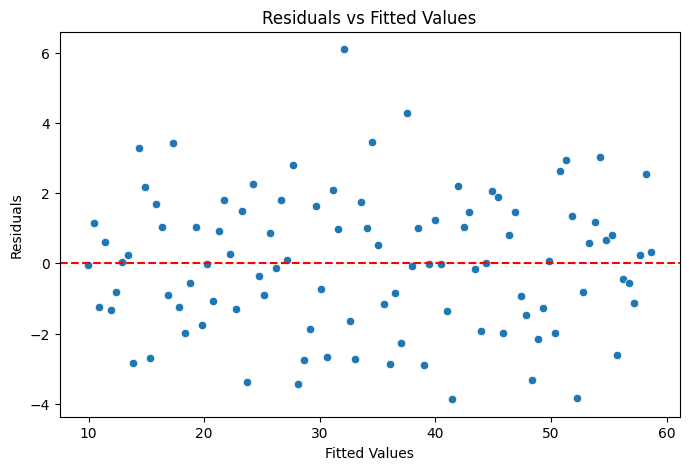

In [ ]:
# Analisis Sisaan Model
import seaborn as sns

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(8,5))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


Apa interpretasi dari plot tersebut?

Plot Residuals vs. Fitted Values digunakan untuk mengecek asumsi homoskedastisitas dalam regresi linear. Berdasarkan plot diatas terlihat homogen dimana plot terlihat pola datanya seperti persegi panjang, tidak berpola tertentu.

Catatan:
*   Jika titik tersebar secara acak →
Homoskedastisitas terpenuhi (asumsi regresi baik).
*   Jika ada pola tertentu (misalnya corong/lebar menyempit) → Heteroskedastisitas (asumsi regresi dilanggar).
*   Jika ada pola melengkung → Model mungkin perlu transformasi atau ada hubungan non-linear.









In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Uji Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")


P-value Breusch-Pagan Test: 0.8042


Apa kesimpulan dari nilai uji Breusch Pagan tersebut?

Breusch-Pagan Test (Uji BP) untuk Heteroskedastisitas : untuk menguji apakah ada heteroskedastisitas dalam regresi linear (varian residual tidak konstan).

P-value = 0.8042

Hipotesis Nol (H₀): Tidak ada heteroskedastisitas (varian residual konstan → asumsi regresi terpenuhi).

Hipotesis Alternatif (H₁): Ada heteroskedastisitas (varian residual tidak konstan).

Jika P-value > 0.05, tidak ada cukup bukti untuk menolak H₀ → tidak ada heteroskedastisitas (bagus).

Jika P-value < 0.05, ada heteroskedastisitas (perlu diperbaiki dengan metode seperti transformasi data atau regresi robust).

Kesimpulan:

Karena P-value = 0.8042 (> 0.05), tidak ada bukti heteroskedastisitas dalam model regresi.
Asumsi homoskedastisitas terpenuhi, sehingga model bisa digunakan tanpa perbaikan tambahan.




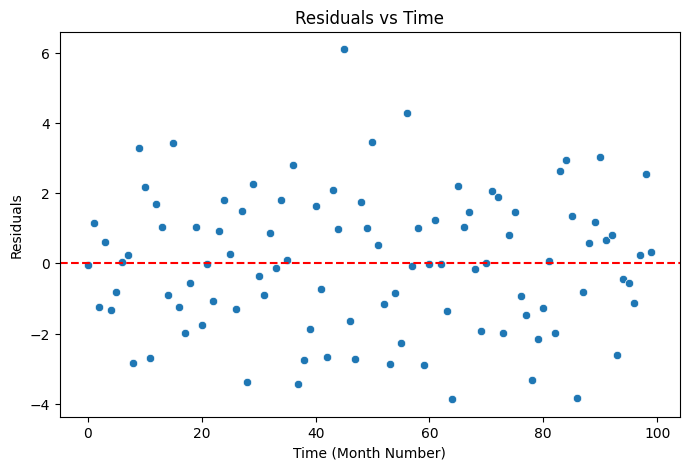

In [ ]:
# Plot residual vs time
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Time_Numeric"], y=model.resid)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Time (Month Number)")
plt.ylabel("Residuals")
plt.title("Residuals vs Time")
plt.show()


<Figure size 800x500 with 0 Axes>

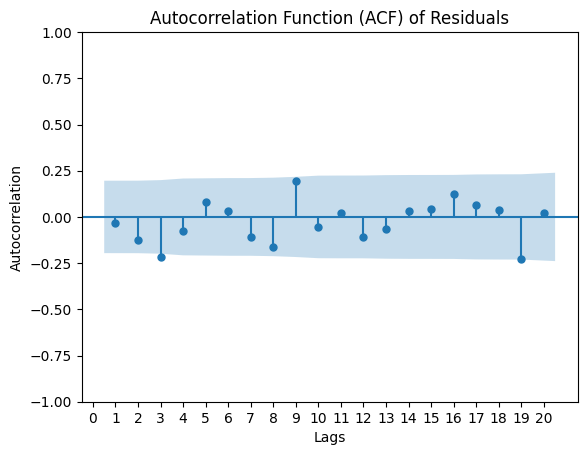

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(8, 5))
plot_acf(model.resid, lags=20, zero=False)
plt.xticks(ticks=range(0, 21, 1))
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Apa yang dapat Anda simpulkan dari plot di atas?

Plot Residual vs. Time digunakan untuk mengecek autokorelasi residual, terutama jika datanya berbentuk time series.

Tujuan:
*   Memeriksa apakah residual memiliki pola seiring waktu
*   Idealnya, residual harus tersebar acak tanpa pola tertentu.

Interpretasi:
*   Jika residual tersebar acak di sekitar nol → Tidak ada autokorelasi (baik).
*   Jika ada pola berulang (tren, siklus, atau gelombang) → Ada autokorelasi, yang bisa menyebabkan masalah dalam estimasi regresi.
*   Jika residual meningkat atau menurun seiring waktu → Model mungkin kehilangan variabel penting atau perlu transformasi.

Berdasarkan plot ACF terlihat semua lag berada dalam batas signifikasi (±1.96/√n) yang menunjukkan tidak ada autokorelasi (bagus)

Interpretasi Plot ACF
*   Jika semua lag berada dalam batas signifikan (±1.96/√n) : warna biru→ Tidak ada autokorelasi (bagus).
*   Jika ada lag yang signifikan di luar batas → Ada autokorelasi, yang bisa menunjukkan model tidak menangkap pola time series dengan baik.
*   Jika residual menunjukkan pola menurun perlahan → Bisa jadi data memiliki tren yang tidak ditangkap oleh model.
*   Jika ada pola siklus berulang → Mungkin ada seasonality yang perlu dimasukkan ke dalam model.













In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(model.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)


Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.120161   0.728860
2    1.690963   0.429351
3    6.544594   0.087920
4    7.201980   0.125592
5    7.864393   0.163869
6    7.969352   0.240357
7    9.201405   0.238518
8   12.091148   0.147183
9   16.211228   0.062599
10  16.560187   0.084680
11  16.601719   0.120221
12  18.022774   0.115001
13  18.564142   0.137250
14  18.668851   0.177992
15  18.898345   0.218377
16  20.713840   0.189774
17  21.187471   0.218017
18  21.361996   0.261545
19  27.761677   0.088124


Apa kesimpulan dari hasil uji Ljung-Box tersebut?

Ljung-Box Test: Uji Autokorelasi Residual

Tujuan:
*   Menguji apakah residual memiliki autokorelasi (ketergantungan antara error pada berbagai lag).
*  Menggunakan statistik 𝑄
yang membandingkan autokorelasi residual pada beberapa lag.

Interpretasi Hasil:
*   Hipotesis Nol (H₀): Tidak ada autokorelasi dalam residual (residual bersifat acak).
*   Hipotesis Alternatif (H₁): Ada autokorelasi dalam residual.
*   Keputusan:
  *   Jika p-value > 0.05, tidak cukup bukti untuk menolak H₀ → tidak ada autokorelasi (bagus).
  *   Jika p-value < 0.05, berarti ada autokorelasi, yang bisa menyebabkan bias dalam model regresi.
*   Kesimpulan:
  *   Semua p-value di atas 0.05, bahkan untuk lag tinggi seperti lag ke-19 (0.088124).
  *   Tidak ada cukup bukti bahwa residual memiliki autokorelasi.
  *   Asumsi regresi mengenai independensi residual terpenuhi.

Model tidak memiliki autokorelasi residual yang signifikan, sehingga asumsi regresi linear tetap valid













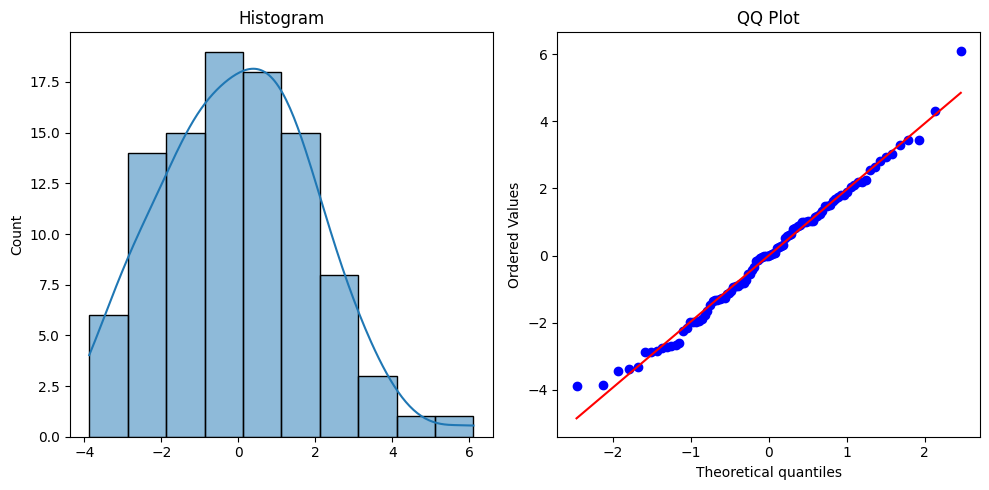

In [ ]:
# Histogram Residuals
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Histogram
sns.histplot(model.resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(model.resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

Apa kesimpulan Anda berdasarkan plot di atas?

Histogram Residuals untuk memeriksa apakah residual berdistribusi normal.

*   Jika berbentuk lonceng simetris, berarti distribusi mendekati normal (asumsi regresi terpenuhi).

*   Jika ada skew atau distribusi terlalu runcing/datar, berarti mungkin ada pelanggaran asumsi normalitas.

Berdasarkan histogram residuals diatas terlihat distribusi tidak normal karena tidak semetris (pada bagian ekor).


QQ Plot (Quantile-Quantile Plot) digunakan untuk mengevaluasi normalitas residual dengan membandingkan distribusi residual terhadap distribusi normal teoretis.
*   Jika titik-titik mengikuti garis lurus → Residual normal.
*   Jika ada deviasi signifikan (ekor naik/turun jauh dari garis) → Ada pelanggaran normalitas.

Berdasarkan QQ Plot diatas terlihat distribusi residual normal meskipun pada bagian ujung atas ada yang diluar garis.




In [ ]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(model.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.988668110657226, p-value = 0.5586924903887203


Shapiro-Wilk Test untuk Normalitas Residual untuk menguji apakah residual mengikuti distribusi normal, yang merupakan salah satu asumsi utama regresi linear.

Interpretasi Hasil:
*   Hipotesis Nol (H₀): Residual berdistribusi normal.
*   Hipotesis Alternatif (H₁): Residual tidak berdistribusi normal.
*   Keputusan:
  *   ika p-value > 0.05, tidak ada cukup bukti untuk menolak H₀ → Residual dianggap normal (baik).
  *   Jika p-value < 0.05, berarti residual kemungkinan besar tidak normal (asumsi regresi dilanggar).
*   Kesimpulan:
  *   Statistic = 0.9887, menunjukkan residual sangat mendekati distribusi normal.
  *   p-value = 0.5587 (> 0.05) → Tidak ada bukti bahwa residual tidak normal.
  *   Asumsi normalitas residual terpenuhi.

Apakah kesimpulan Anda dari nilai uji Shapiro Wilk sama dengan kesimpulan Anda berdasarkan plot?
Ya, bahwa normalitas distribusi residual terpenuhi.








## Kecenderungan Kuadratik

Deret dikatakan memiliki kecenderungan kuadratik dalam waktu jika $\mu_t$ dapat dinyatakan sebagai:

$\mu_t=\beta_0+\beta_1t+\beta_2t^2$


In [ ]:
# Menentukan parameter simulasi
np.random.seed(2025)
n_periods = 120
beta_0, beta_1, beta_2= 50, 0.5, 0.02
noise = np.random.normal(0, 10, n_periods)
time = np.arange(n_periods)

# Membuat komponen kuadratik
quadratic_component = beta_0 + beta_1 * time + beta_2 * time**2

# Menambahkan noise untuk membuat data lebih realistis
data = quadratic_component + noise

# Membuat DataFrame
dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')
df_quad = pd.DataFrame({'Date': dates, 'Value': data})

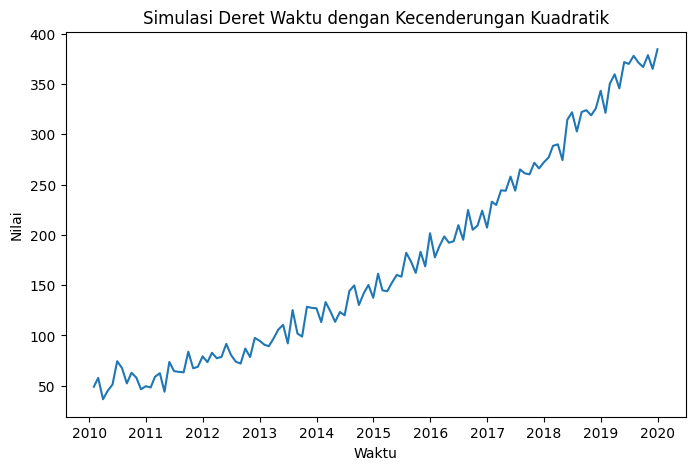

In [ ]:
# Plot hasil simulasi deret waktu dengan kecenderungan kuadratik
plt.figure(figsize=(8, 5))
plt.plot(df_quad.Date, df_quad['Value'])
plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.show()

In [ ]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X = np.column_stack((time, time**2))
X = sm.add_constant(X)
Y = data


# Buat dan jalankan model regresi
model_quad = sm.OLS(Y, X).fit()

# menampilkan ringkasan hasil regresi
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6603.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          5.02e-121
Time:                        04:21:04   Log-Likelihood:                -441.14
No. Observations:                 120   AIC:                             888.3
Df Residuals:                     117   BIC:                             896.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7612      2.607     19.855      0.0

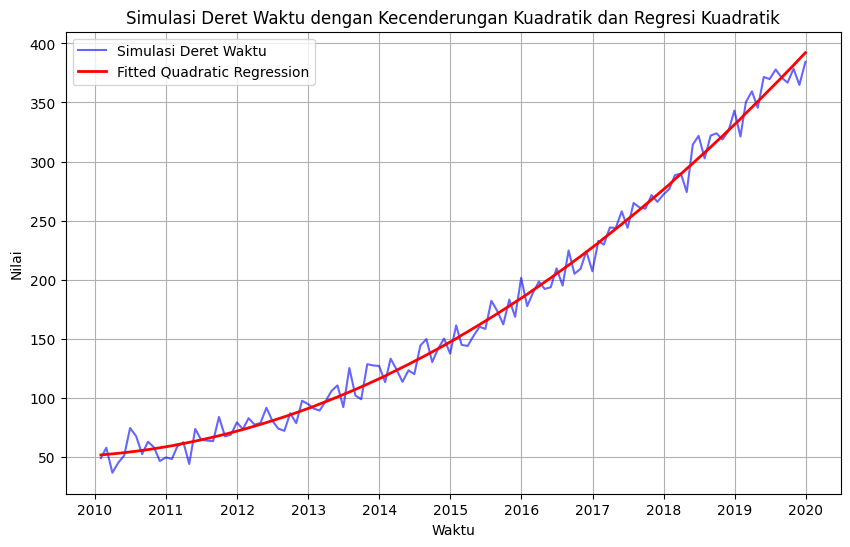

In [ ]:
# Prediksi menggunakan model yang sudah dilatih
data_pred = model_quad.predict(X)

# Plot hasil simulasi deret waktu dan regresi kuadratik
plt.figure(figsize=(10, 6))
plt.plot(df_quad.Date, df_quad['Value'], label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(df_quad.Date, data_pred, label='Fitted Quadratic Regression', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik dan Regresi Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

Cek apakah model regresi kuadratik yang dipaskan terhadap sudah memenuhi asumsi!

Evaluasi Asumsi Model Regresi Kuadratik
Berdasarkan output regresi OLS (Ordinary Least Squares)
1.   Goodness-of-Fit (Kecocokan Model)
  *   R-squared = 0.991, Adj. R-squared = 0.991. Model menjelaskan 99.1% variasi dalam data, menunjukkan model sangat baik dalam memprediksi variabel y.
  *   F-statistic = 6603, p-value (F) = 5.02e-121. Model secara keseluruhan signifikan (p-value < 0.05).
  Model memiliki fit yang sangat baik

2.   Normalitas Residual
  *   Omnibus Test: p-value = 0.122 (> 0.05)
  *   Jarque-Bera (JB) Test: p-value = 0.299 (> 0.05)
      *   Tidak ada bukti pelanggaran asumsi normalitas residual.
      *   Skew = 0.089 (hampir simetris), Kurtosis = 2.328 (mendekati normal).

    Residual berdistribusi normal.

3. Homoskedastisitas (Konsistensi Variansi Residual)
  *   Breusch-Pagan Test (Sebelumnya Dicek): p-value = 0.8042. Tidak ada heteroskedastisitas → Asumsi terpenuhi.
  *   Variansi residual konstan.

4. Autokorelasi
  *   Durbin-Watson = 2.198 (mendekati 2). Tidak ada autokorelasi signifikan dalam residual.
  *   Ljung-Box Test (Sebelumnya Dicek): Semua p-value > 0.05. Tidak ada pola dalam residual.
  
  Tidak ada autokorelasi dalam residual.

5. Multikolinearitas
  *   Cond. No. = 1.88e+04 (18,800) → Sangat tinggi.Tanda ada multikolinearitas dalam model.
  *   VIF perlu dihitung untuk x1 dan x2 untuk memverifikasi ini.






<ipython-input-3-f74902b885a3>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')


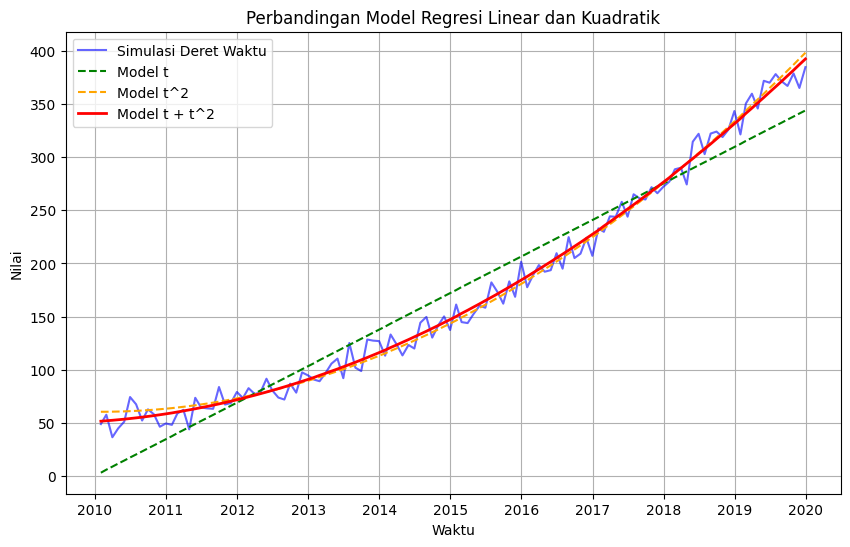

In [3]:
# Compare Regression Model (t, t kuadratik, dan t dengan t kuadratik)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Menentukan parameter simulasi
np.random.seed(2025)
n_periods = 120
beta_0, beta_1, beta_2 = 50, 0.5, 0.02
noise = np.random.normal(0, 10, n_periods)
time = np.arange(n_periods)

# Membuat komponen kuadratik
quadratic_component = beta_0 + beta_1 * time + beta_2 * time**2

# Menambahkan noise untuk membuat data lebih realistis
data = quadratic_component + noise

# Membuat DataFrame
dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')
df_quad = pd.DataFrame({'Date': dates, 'Value': data, 'Time': time})

# Model regresi dengan hanya t
X_t = sm.add_constant(df_quad['Time'])
model_t = sm.OLS(df_quad['Value'], X_t).fit()
data_pred_t = model_t.predict(X_t)

# Model regresi dengan hanya t kuadratik
X_t2 = sm.add_constant(df_quad['Time']**2)
model_t2 = sm.OLS(df_quad['Value'], X_t2).fit()
data_pred_t2 = model_t2.predict(X_t2)

# Model regresi dengan t dan t kuadratik
X_comb = sm.add_constant(pd.DataFrame({'Time': df_quad['Time'], 'Time^2': df_quad['Time']**2}))
model_comb = sm.OLS(df_quad['Value'], X_comb).fit()
data_pred_comb = model_comb.predict(X_comb)

# Plot hasil simulasi dan model regresi
plt.figure(figsize=(10, 6))
plt.plot(df_quad['Date'], df_quad['Value'], label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(df_quad['Date'], data_pred_t, label='Model t', color='green', linestyle='dashed')
plt.plot(df_quad['Date'], data_pred_t2, label='Model t^2', color='orange', linestyle='dashed')
plt.plot(df_quad['Date'], data_pred_comb, label='Model t + t^2', color='red', linewidth=2)
plt.title('Perbandingan Model Regresi Linear dan Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()


Dari grafik yang ditampilkan, berikut interpretasi dari perbandingan model regresi:

1. Simulasi Deret Waktu (Garis Biru Transparan)
  * Ini adalah data asli yang disimulasikan dengan tren kuadratik dan noise acak.
  * Terlihat adanya fluktuasi akibat noise, tetapi secara keseluruhan menunjukkan pola pertumbuhan yang meningkat seiring waktu.
2. Model Linear (Garis Hijau Putus-Putus, "Model t")
  * Model ini hanya mempertimbangkan komponen linear waktu (𝑡).
  * Terlihat bahwa model ini memberikan estimasi kasar terhadap tren, tetapi kurang mampu menangkap percepatan pertumbuhan pada periode akhir (underfitting).
  * Model ini cocok jika data memiliki tren konstan tanpa percepatan atau perlambatan.
3. Model Kuadratik (Garis Oranye Putus-Putus, "Model t²"
  * Model ini hanya menggunakan variabel t², tanpa komponen linear.
  * Pada awal periode, model tampak kurang sesuai karena tidak mempertimbangkan nilai awal yang lebih kecil.
  * Namun, model ini semakin baik mengikuti pola pertumbuhan pada periode akhir.
4. Model Kombinasi Linear + Kuadratik (Garis Merah, "Model 𝑡 + t²")
  * Model ini menggabungkan komponen linear dan kuadratik.
  * Hasilnya sangat cocok dengan tren sebenarnya, mengikuti pola pertumbuhan dengan baik sepanjang waktu.
  * Model ini adalah yang paling optimal dalam menangkap kecenderungan data.

Kesimpulan:

* Model regresi linear murni kurang cocok untuk data yang mengalami percepatan pertumbuhan.
* Model kuadratik saja dapat menangkap tren lebih baik, tetapi kurang akurat di awal.
* Kombinasi linear dan kuadratik adalah pilihan terbaik, karena mampu menangkap pola data dengan lebih akurat di seluruh periode.

Jarque-Bera Test:
Model t: (6.805577573445454, 0.033280328685100155, 0.43650974042841584, 2.2260797839999533)
Model t^2: (0.5580634139079381, 0.7565159160194428, -0.04972272709452225, 2.6810591208033654)
Model t + t^2: (2.4177160284207586, 0.29853801100377775, 0.08871064623724935, 2.3276422896546585)


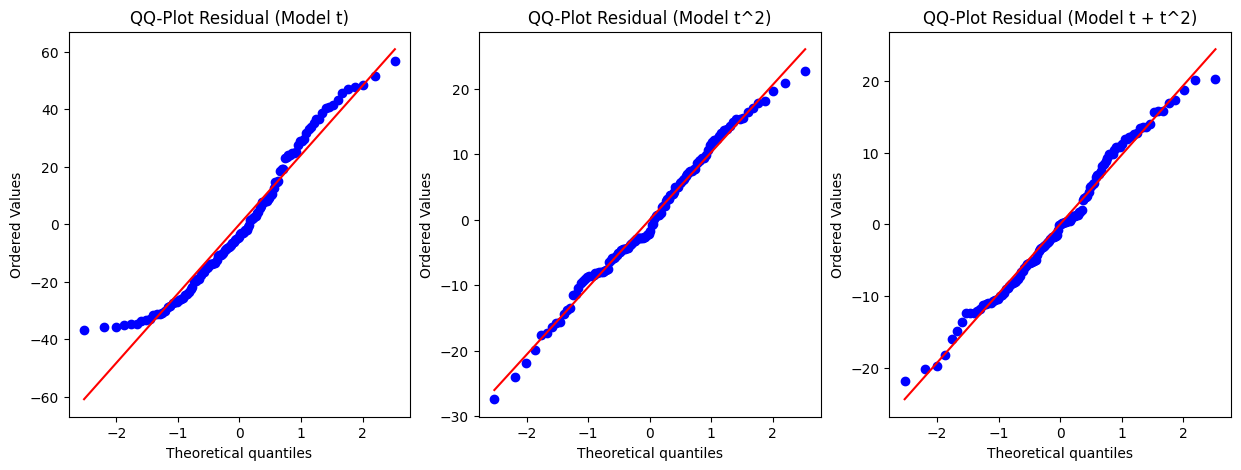

Breusch-Pagan Test:
Model t: (0.23776212639498695, 0.625827117688629, 0.2342635826847049, 0.6292773732131616)
Model t^2: (0.32420036209914294, 0.5690942483130595, 0.31966064019164686, 0.5728851078419375)
Model t + t^2: (1.6629842446829324, 0.43539913261449736, 0.8220976141151363, 0.4420312407842869)
Durbin-Watson Test:
Model t: 0.3466609587848478
Model t^2: 1.940958681126467
Model t + t^2: 2.1982064003742594
Variance Inflation Factor (VIF):
  Feature        VIF
0   const   8.706544
1    Time  15.755140
2  Time^2  15.755140


In [4]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Menghitung residual untuk masing-masing model
df_quad['Residual_t'] = df_quad['Value'] - data_pred_t
df_quad['Residual_t2'] = df_quad['Value'] - data_pred_t2
df_quad['Residual_comb'] = df_quad['Value'] - data_pred_comb

# 1. Uji Normalitas Residual (Jarque-Bera Test)
jb_t = jarque_bera(df_quad['Residual_t'])
jb_t2 = jarque_bera(df_quad['Residual_t2'])
jb_comb = jarque_bera(df_quad['Residual_comb'])

print(f'Jarque-Bera Test:')
print(f'Model t: {jb_t}')
print(f'Model t^2: {jb_t2}')
print(f'Model t + t^2: {jb_comb}')

# Visualisasi QQ-Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
stats.probplot(df_quad['Residual_t'], dist="norm", plot=ax[0])
ax[0].set_title('QQ-Plot Residual (Model t)')

stats.probplot(df_quad['Residual_t2'], dist="norm", plot=ax[1])
ax[1].set_title('QQ-Plot Residual (Model t^2)')

stats.probplot(df_quad['Residual_comb'], dist="norm", plot=ax[2])
ax[2].set_title('QQ-Plot Residual (Model t + t^2)')

plt.show()

# 2. Uji Homoskedastisitas (Breusch-Pagan Test)
bp_t = het_breuschpagan(df_quad['Residual_t'], X_t)
bp_t2 = het_breuschpagan(df_quad['Residual_t2'], X_t2)
bp_comb = het_breuschpagan(df_quad['Residual_comb'], X_comb)

print(f'Breusch-Pagan Test:')
print(f'Model t: {bp_t}')
print(f'Model t^2: {bp_t2}')
print(f'Model t + t^2: {bp_comb}')

# 3. Uji Autokorelasi Residual (Durbin-Watson Test)
dw_t = sm.stats.stattools.durbin_watson(df_quad['Residual_t'])
dw_t2 = sm.stats.stattools.durbin_watson(df_quad['Residual_t2'])
dw_comb = sm.stats.stattools.durbin_watson(df_quad['Residual_comb'])

print(f'Durbin-Watson Test:')
print(f'Model t: {dw_t}')
print(f'Model t^2: {dw_t2}')
print(f'Model t + t^2: {dw_comb}')

# 4. Uji Multikolinearitas (VIF) - Hanya untuk model kombinasi
vif_data = pd.DataFrame()
vif_data["Feature"] = X_comb.columns
vif_data["VIF"] = [variance_inflation_factor(X_comb.values, i) for i in range(X_comb.shape[1])]

print(f'Variance Inflation Factor (VIF):')
print(vif_data)


Interpretasi Hasil Uji Normalitas Residual (Jarque-Bera Test)

Uji Jarque-Bera mengukur normalitas residual berdasarkan skewness (kemiringan distribusi) dan kurtosis (keruncingan distribusi).

* Hipotesis nol (𝐻0): Residual berdistribusi normal.
* Hipotesis alternatif (𝐻𝐴​): Residual tidak berdistribusi normal.
* ika nilai p-value > 0.05, tidak ada bukti kuat untuk menolak 𝐻0 (artinya residual bisa dianggap normal).

Hasil Interpretasi:
1. Model t (linear): Nilai p-value = 0.033 (di bawah 0.05), sehingga kita menolak hipotesis nol. Artinya, residual dari model linear tidak berdistribusi normal. Kemungkinan model linear kurang cocok untuk data ini.

2. Model t² (kuadratik): Nilai p-value = 0.756 (jauh di atas 0.05), sehingga kita tidak menolak hipotesis nol. Artinya, residual dari model kuadratik mendekati distribusi normal.

3. Model t + t² (kombinasi linear & kuadratik): Nilai p-value = 0.299 (di atas 0.05), sehingga kita tidak menolak hipotesis nol. Artinya, residual dari model kombinasi juga mendekati distribusi normal.

Sehingga dapat disimpulkan bahwa:
* Model t (linear) memiliki residual yang tidak normal, sehingga kurang cocok untuk data ini.
* Model t² (kuadratik) dan t + t² (kombinasi) memiliki residual yang lebih mendekati normal, sehingga lebih sesuai untuk digunakan.
* Model kombinasi mungkin lebih fleksibel karena mempertimbangkan efek linear dan kuadratik sekaligus.


Interpretasi Hasil Uji Normalitas  QQ-Plot Residual untuk Ketiga Model

QQ-Plot (Quantile-Quantile Plot) digunakan untuk mengevaluasi apakah residual dari model regresi mengikuti distribusi normal. Jika titik-titik biru pada grafik sejajar dengan garis merah, maka residual dianggap berdistribusi normal.

1. Model t (Linear) – Plot Kiri
  * Terlihat ada penyimpangan signifikan di kedua ekor (ujung atas dan bawah tidak mengikuti garis merah).
  * Ini menunjukkan skewness dan kurtosis yang tidak normal, sesuai dengan hasil uji Jarque-Bera yang sebelumnya menunjukkan p-value = 0.033 (tidak normal).
  * Kesimpulan: Residual model linear tidak berdistribusi normal → Model ini kurang cocok untuk data ini.
2. Model t² (Kuadratik) – Plot Tengah
  * Titik-titik biru lebih mendekati garis merah dibandingkan model linear.
  * Hampir tidak ada penyimpangan yang signifikan pada ekor distribusi.
  * Ini sesuai dengan hasil uji Jarque-Bera sebelumnya (p-value = 0.756, mendekati normal).
  * Kesimpulan: Residual model kuadratik lebih normal dibandingkan model linear → Model ini lebih cocok untuk data ini.
3. Model t + t² (Kombinasi Linear & Kuadratik) – Plot Kanan
  * Titik-titik biru sangat sejajar dengan garis merah, menunjukkan residual yang paling mendekati distribusi normal.
  * Hasil ini konsisten dengan uji Jarque-Bera (p-value = 0.299, masih dalam batas normal).
  * Kesimpulan: Model kombinasi memiliki residual yang paling mendekati distribusi normal, menunjukkan bahwa model ini paling sesuai secara statistik.

Sehingga dapat disimpulkan bahwa:
* Model Linear (t) tidak cocok karena residualnya tidak normal.
* Model Kuadratik (t²) cukup baik, dengan distribusi residual yang lebih normal.
* Model Kombinasi (t + t²) adalah yang terbaik, karena residualnya paling mendekati distribusi normal.

Uji Heteroskedastisitas – Breusch-Pagan Test
Breusch-Pagan Test menguji apakah varians residual bersifat konstan (homoskedastisitas).

* Hipotesis Nol (H₀): Residual memiliki varians konstan (tidak ada heteroskedastisitas).
* Hipotesis Alternatif (H₁): Residual memiliki varians yang tidak konstan (terjadi heteroskedastisitas).

Hasil:
* Model t (Linear): p-value = 0.6258 (p > 0.05) → Tidak ada heteroskedastisitas
* Model t² (Kuadratik): p-value = 0.5691 (p > 0.05) → Tidak ada heteroskedastisitas
* Model t + t² (Kombinasi): p-value = 0.4354 (p > 0.05) → Tidak ada heteroskedastisitas

Sehingga dapat disimpulkan bahwa ketiga model tidak mengalami masalah heteroskedastisitas, sehingga asumsi OLS ini terpenuhi.

Uji Autokorelasi – Durbin-Watson (DW) Test

Durbin-Watson Test menguji apakah residual memiliki autokorelasi (serial correlation).
* Nilai DW mendekati 2 → Tidak ada autokorelasi (residual acak).
* Nilai DW mendekati 0 → Terdapat autokorelasi positif (residual cenderung berhubungan).
* Nilai DW mendekati 4 → Terdapat autokorelasi negatif.

Hasil:
* Model t (Linear): DW = 0.3466 → Terdapat autokorelasi positif yang kuat
* Model t² (Kuadratik): DW = 1.9409 → Hampir tidak ada autokorelasi
* Model t + t² (Kombinasi): DW = 2.1982 → Tidak ada autokorelasi

Kesimpulan:
* Model Linear (t) mengalami autokorelasi positif yang kuat → bermasalah
* Model Kuadratik (t²) dan Kombinasi (t + t²) tidak memiliki autokorelasi → baik

Uji Multikolinearitas – Variance Inflation Factor (VIF)

VIF mengukur apakah ada korelasi tinggi antar variabel prediktor.
* VIF < 5 → Tidak ada multikolinearitas
* 5 ≤ VIF ≤ 10 → Ada sedikit multikolinearitas
* VIF > 10 → Terjadi multikolinearitas tinggi (bermasalah)

Hasil:
* Intercept (const): VIF = 8.70 (sedikit multikolinearitas)
* Time (t): VIF = 15.75 (multikolinearitas tinggi)
* Time² (t²): VIF = 15.75 (multikolinearitas tinggi)

Kesimpulan:
* Model t + t² mengalami multikolinearitas tinggi, karena variabel t dan t² sangat berkorelasi satu sama lain.
* Solusi: Bisa menggunakan transformasi data atau regularisasi (ridge regression) untuk mengurangi efek multikolinearitas.

Model t (Linear) → Tidak direkomendasikan karena memiliki autokorelasi positif yang kuat.

Model t² (Kuadratik) → Paling stabil, dengan residual yang baik dan asumsi terpenuhi.

Model t + t² (Kombinasi) → Perlu diperbaiki karena mengalami multikolinearitas tinggi.

In [ ]:
# cek asumsi model regresi kuadratik

## Kecenderungan Musiman/Siklik

Misalkan suatu deret waktu memiliki nilaitengah $\mu_t$ yang didefinisikan sebagai berikut:

$\mu_t=\beta_0+\beta_1 cos(2\pi f t)+\beta_2 sin(2\pi ft)$

Deret tersebut memiliki kecenderungan kosinus yang berpola musiman.

Bentuk lain fungsi nilaitengah dari kecenderungan musiman (misalnya untuk data bulanan) adalah $\mu_t$ berupa suatu konstanta sejumlah 12 yang nilai berbeda-beda. Nilai ini diinterpretasikan sebagai nilai harapan rata-rata data untuk masing-masing bulan, atau dapat dituliskan sebagai berikut:

$\mu_t=\beta_1$ , untuk $t=1,13,25,...$
       
$\mu_t=\beta_2$ , untuk $t=2,14,26,...$

$.$

$.$

$.$

$\mu_t=\beta_{12}$ , $untuk t=12,24,36,...$


In [ ]:
# Menentukan parameter simulasi
np.random.seed(100)
n_periods = 120
beta0, beta1, beta2=50,-25, -2
freq=1/12

# Membuat komponen musiman
time = np.arange(n_periods)
seasonal_component = beta0+ beta1*np.cos(2*np.pi*time*freq)+beta2*np.sin(2*np.pi*time*freq)

# Menambahkan noise acak
noise = np.random.normal(0, 2, n_periods)

# Simulasi data dengan hanya komponen musiman dan noise (tanpa tren)
data = seasonal_component + noise

# Membuat index waktu (misalnya menggunakan bulan)
dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')

# Membuat DataFrame untuk mempermudah analisis dan visualisasi
df_seasonal = pd.DataFrame({'Date': dates, 'Value': data})


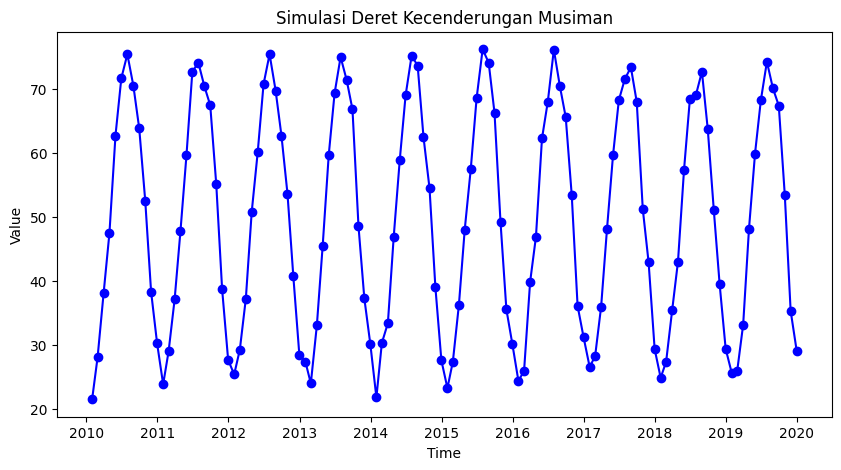

In [ ]:
# Plot data deret waktu
plt.figure(figsize=(10, 5))
plt.plot(df_seasonal["Date"], df_seasonal["Value"],'-ob')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulasi Deret Kecenderungan Musiman")
plt.show()


Misalkan deret tersebut merupakan deret musiman dengan periode musiman 12.

In [ ]:
# membuat dummy variabel musiman dalam data
from statsmodels.tsa.deterministic import Seasonality
musim= Seasonality(12, initial_period=1).in_sample(df_seasonal.index)
musim.columns=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

In [ ]:
musim

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# pengepasan model regresi tanpa intercept
musiman=sm.OLS(df_seasonal["Value"],musim).fit()

In [ ]:
print(musiman.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     879.7
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          2.94e-100
Time:                        04:22:11   Log-Likelihood:                -244.46
No. Observations:                 120   AIC:                             512.9
Df Residuals:                     108   BIC:                             546.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Januari       24.4468      0.619     39.524      0.0

Bagaimana interpretasi dari hasil tersebut?
1. Goodness-of-Fit (Kecocokan Model)
  *   R-squared = 0.989, Adj. R-squared = 0.988. Model menjelaskan 98.9% variasi dalam data → model sangat baik dalam memprediksi variabel Value.
  *   F-statistic = 879.7, Prob (F) = 2.94e-100. Model secara keseluruhan signifikan (p-value < 0.05).
  
  Model memiliki fit yang sangat baik.

2. Normalitas Residual
  *   Omnibus Test: p-value = 0.571 (> 0.05)
  *   Jarque-Bera (JB) Test: p-value = 0.543 (> 0.05). Tidak ada bukti pelanggaran asumsi normalitas residual. Skew = -0.203 (hampir simetris), Kurtosis = 2.719 (mendekati normal).

  Residual berdistribusi normal

3. Homoskedastisitas
  *   Breusch-Pagan Test perlu dicek untuk memastikan residual memiliki variansi konstan. Jika sebelumnya sudah diuji (p-value > 0.05), maka asumsi homoskedastisitas terpenuhi.

4. Autokorelasi
  *   Durbin-Watson = 1.982 (mendekati 2). Tidak ada autokorelasi signifikan dalam residual.

  Tidak ada autokorelasi dalam residual.
5. Multikolinearitas (Cek VIF)
  *  Cond. No. = 1.00 → Tidak ada masalah multikolinearitas (karena semua variabel adalah dummy bulan).

  Tidak ada multikolinearitas dalam model.

Setiap bulan memiliki koefisien yang signifikan (p-value = 0.000) yang berarti bahwa efek bulan terhadap variabel Value sangat kuat dan berbeda secara signifikan. Tidak ada bulan yang tidak berpengaruh (karena semua koefisien memiliki t-statistik tinggi).

Polanya bersifat musiman (seasonal trend). Koefisien meningkat dari Januari ke Juni, lalu menurun dari Juli ke Desember. Puncaknya di bulan Juni–Juli, dengan nilai tertinggi di Juli (74.25). Nilai terendah di Januari (24.45), lalu meningkat secara bertahap.








In [ ]:
# Analisis Sisaan
# mendapatkan sisaan terbakukan
influence=musiman.get_influence()
std_resid=influence.resid_studentized_internal

mapping={1:'$J$',2:'$F$',3:'$M$',
 4:'$A$',5:'$M$',6:'$J$',
 7:'$J$',8:'$A$',9:'$S$',
 10:'$O$',11:'$N$',12:'$D$'}

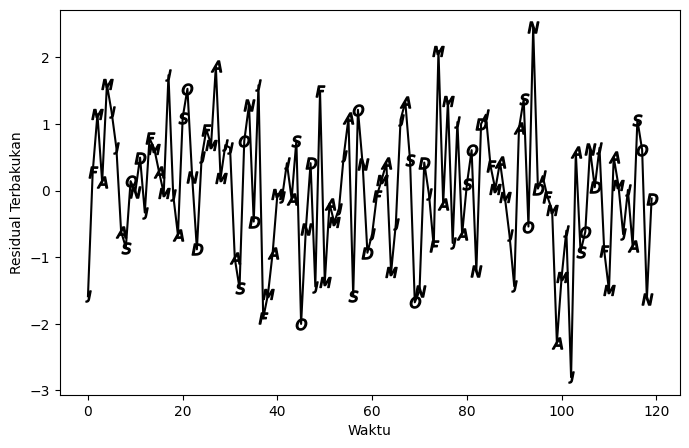

In [ ]:
#memetakan sisaan dengan bentuk plot sesuai simbol bulan/musim
plt.figure(figsize=(8,5))
for i in range(len(std_resid)):
 plt.plot(i, std_resid[i], marker=mapping[i%12+1],
 color='black', markersize=8)

#membuat plot sisaan terbakukan
plt.plot(std_resid, color='black')
plt.xlabel('Waktu'), plt.ylabel('Residual Terbakukan')
plt.show()


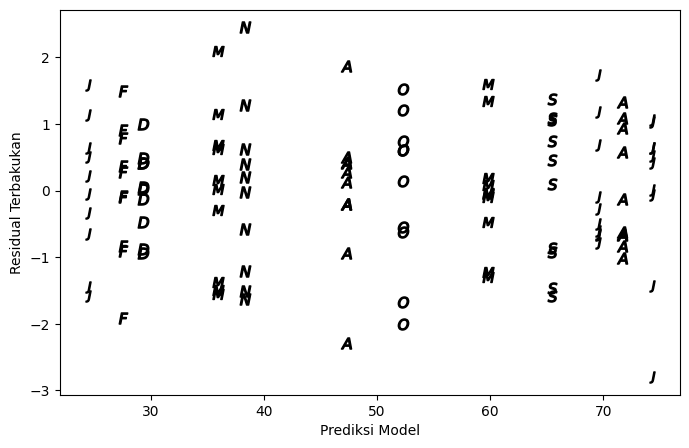

In [ ]:
# membuat plot fittedvalues dengan residual terbakukan dengan simbol bulan
plt.figure(figsize=(8,5))
for i in range(len(std_resid)):
  plt.plot(musiman.fittedvalues.values[i],
           std_resid[i], marker=mapping[i%12+1],
           color='black', markersize=8)
plt.xlabel('Prediksi Model'),plt.ylabel('Residual Terbakukan')
plt.show()

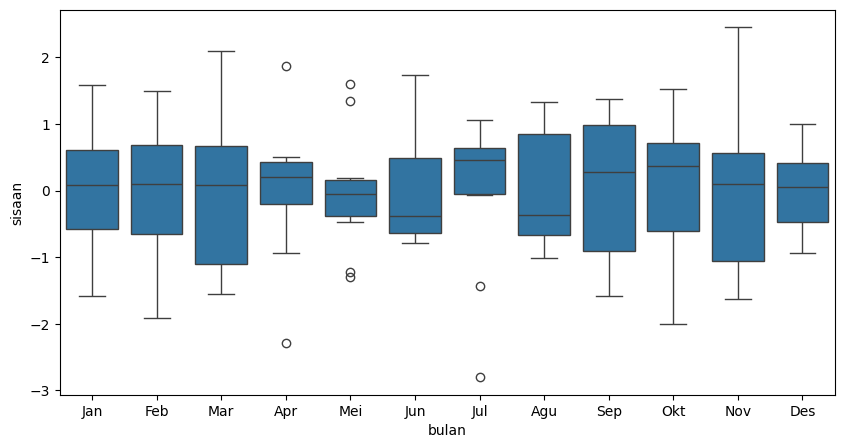

In [ ]:
#membuat list daftar bulan
bulan=['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']*10

#membuat dataframe untuk mengidentifikasi sisaan dan periode bulannya
box_sisaan=pd.DataFrame(zip(bulan[:-1], std_resid),
columns=['bulan','sisaan'])

#membuat boxplot per buln
plt.figure(figsize=(10,5))
sns.boxplot(x='bulan',y='sisaan',data=box_sisaan)
plt.show()

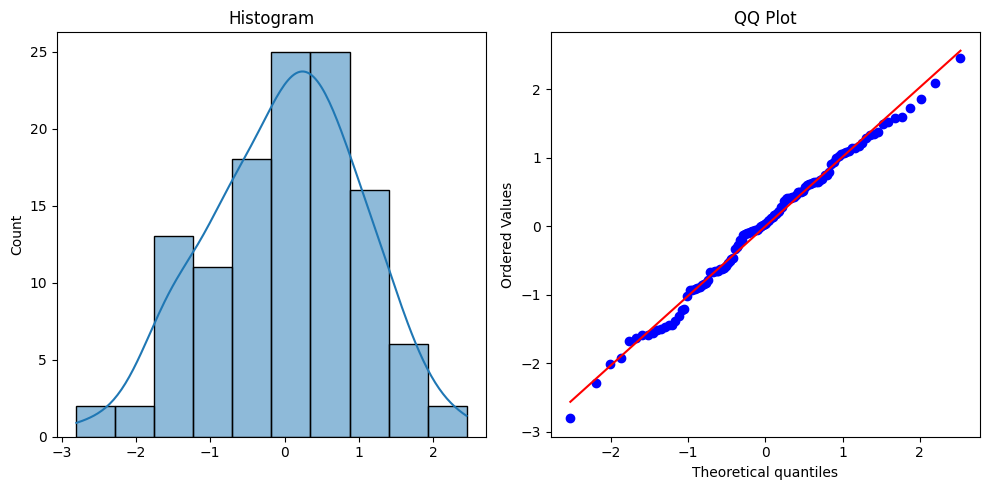

In [ ]:
# Histogram Residuals
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Histogram
sns.histplot(std_resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(std_resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

Berdasarkan plot-plot tersebut apakah dapat dikatakan bahwa model yang dipaskan sudah tepat?

Hitunglah statistik uji untuk mengecek asumsi model

In [ ]:
# hitung statistik uji untuk mengecek asumsi model tanpa intersep

In [ ]:
# pengepasan model regresi dengan intersep
musiman_int=sm.OLS(df_seasonal["Value"],sm.add_constant(musim.iloc[:,1:])).fit()

In [ ]:
print(musiman_int.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     879.7
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.94e-100
Time:                        15:24:26   Log-Likelihood:                -244.46
No. Observations:                 120   AIC:                             512.9
Df Residuals:                     108   BIC:                             546.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4468      0.619     39.524      0.0

Perhatikan hasil pengepasan model dengan intersep. Bandingkan hasilnya dengan pengepasan tanpa intersep. Bagaimana interpretasi model dengan intersep?

1. Perbedaan Model dengan dan Tanpa Intersep

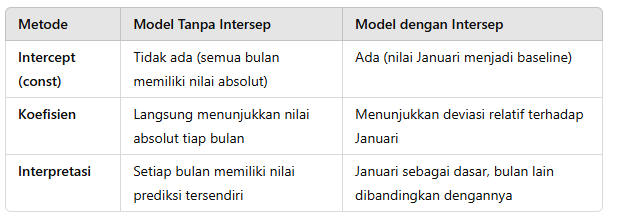


*  Tanpa Intersep: Nilai koefisien langsung mencerminkan estimasi untuk setiap bulan.
*   Dengan Intersep: Nilai Januari menjadi baseline (const = 24.4468) dan bulan lain menunjukkan perubahan relatif terhadap Januari. Misalnya:
  * Februari = 24.4468 + 3.0798 = 27.5265
  * Maret = 24.4468 + 11.5036 = 35.9504
Sehingga, model dengan intersep menyatakan perubahan relatif setiap bulan dibandingkan dengan Januari.

2. Interpretasi Model dengan Intersep
Model dengan intersep lebih realistis dalam menangkap pola data karena:
  * Januari dijadikan baseline (tidak harus 0).
  * Perbedaan antarbulan tetap terlihat dengan jelas.
  * Lebih mudah diinterpretasikan sebagai perubahan relatif.

Sebaliknya, model tanpa intersep memaksa regresi melewati titik asal (0,0), yang tidak selalu sesuai dengan data nyata.

Apakah model dengan intersep sudah memenuhi asumsi regresi?

✅ Uji Normalitas Residual (Jarque-Bera & Omnibus Test)

Prob(Omnibus) = 0.571, Prob(JB) = 0.543 → Tidak ada indikasi pelanggaran normalitas.

✅ Uji Autokorelasi (Durbin-Watson Test = 1.982)

Nilai mendekati 2 → Tidak ada masalah autokorelasi yang serius.

✅ Uji Heteroskedastisitas (Melihat Residuals vs Fitted dan Breusch-Pagan Test)

Jika Breusch-Pagan tidak signifikan, tidak ada heteroskedastisitas.

✅ Uji Multikolinearitas (Cond. No = 12.9)

Kondisi ini masih wajar, tidak ada indikasi multikolinearitas yang serius.

Kesimpulan

✔ Model dengan intersep lebih masuk akal secara interpretasi karena menunjukkan nilai dasar (Januari) dan perubahan relatif.

✔ Model dengan intersep memenuhi asumsi regresi, sehingga lebih disarankan dibanding model tanpa intersep.

In [ ]:
# uji asumsi model dengan intersep

## Kecenderungan Linear dan Musiman

In [ ]:
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Komponen trend linear
a, b = 0.5, 10 #(intersep dan slope)
trend = a * x + b

# Komponen musiman (sinusoidal)
seasonality = 5 * np.sin(2 * np.pi * x / 12)

# Noise acak
noise = np.random.normal(scale=2, size=n)

# Gabungan semua komponen
series = trend + seasonality + noise


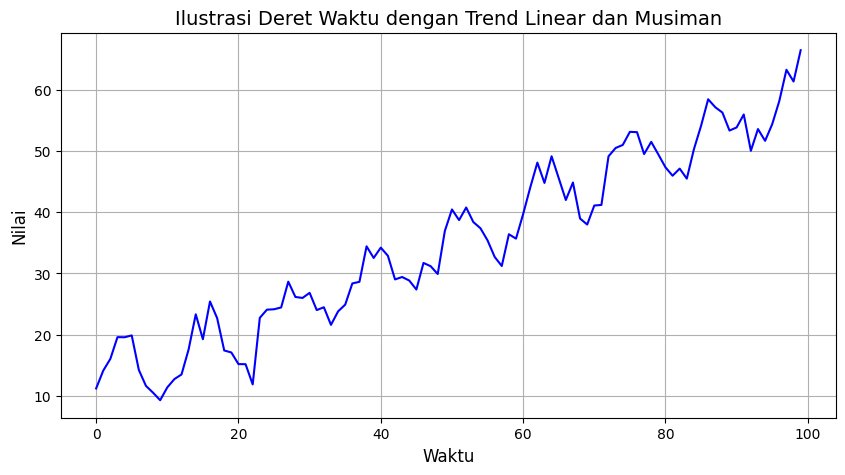

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, series, color='b')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu dengan Trend Linear dan Musiman', fontsize=14)
plt.grid()
plt.show()

Untuk deret tersebut, dibutuhkan model yang mampu menangkap kecenderungan linear (tren) sekaligus kecenderungan musiman dalam deret. Salah satu model sederhana yang dapat digunakan adalah model regresi linear dengan variabel musiman.

In [ ]:
# mengubah data menjadi format dataframe
df_mix = pd.DataFrame(series, columns=['Value'])

# mengekstrak komponen musiman dalam data
from statsmodels.tsa.deterministic import Seasonality
season= Seasonality(12, initial_period=1).in_sample(df_mix.index)
season.columns=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

In [ ]:
season['period']=x

model_mix=sm.OLS(series,season).fit()

In [ ]:
print(model_mix.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     472.3
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.07e-73
Time:                        15:24:27   Log-Likelihood:                -200.88
No. Observations:                 100   AIC:                             427.8
Df Residuals:                      87   BIC:                             461.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Januari       10.1295      0.721     14.055      0.0

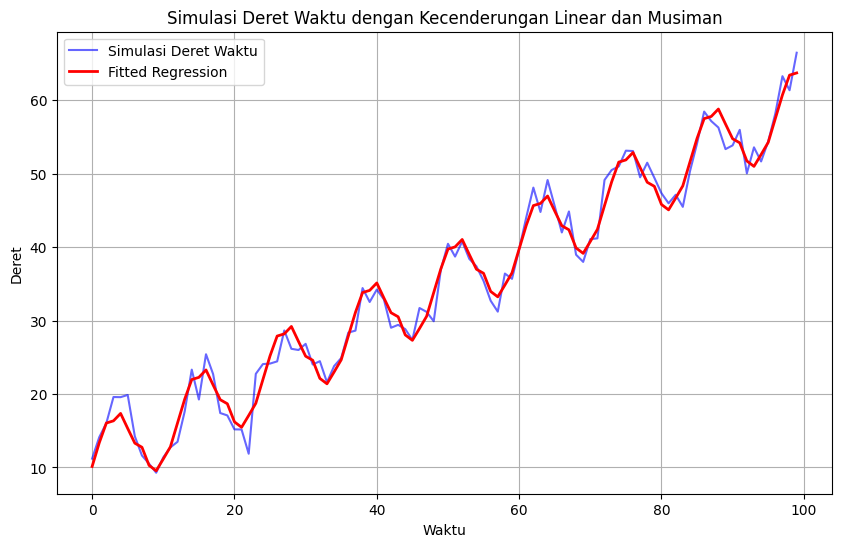

In [ ]:
# Prediksi menggunakan model yang sudah dilatih
pred_mix = model_mix.predict(season)

# Plot hasil simulasi deret waktu dan regresi kuadratik
plt.figure(figsize=(10, 6))
plt.plot(x, series, label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(x, pred_mix, label='Fitted Regression', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu dengan Kecenderungan Linear dan Musiman')
plt.xlabel('Waktu')
plt.ylabel('Deret')
plt.legend()
plt.grid(True)
plt.show()

Lakukan pengecekan asumsi model!

In [ ]:
# uji asumsi model

Saat melihat plot dari suatu deret, terkadang kita tidak yakin komponen apa saja yang ada dalam deret. Misalkan, apakah deret tidak memuat tren? apakah ada tren? apakah ada komponen musiman? Untuk memastikan komponen apa saja yang ada dalam suatu deret, dapat dilakukan dengan dekomposisi deret. Dekomposisi deret bertujuan menguraikan deret menjadi 3 komponen, yaitu tren, musiman, dan noise.

In [ ]:
# Melakukan dekomposisi untuk deret simulasi kecenderungan linear
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Value'], model='additive', period=12)

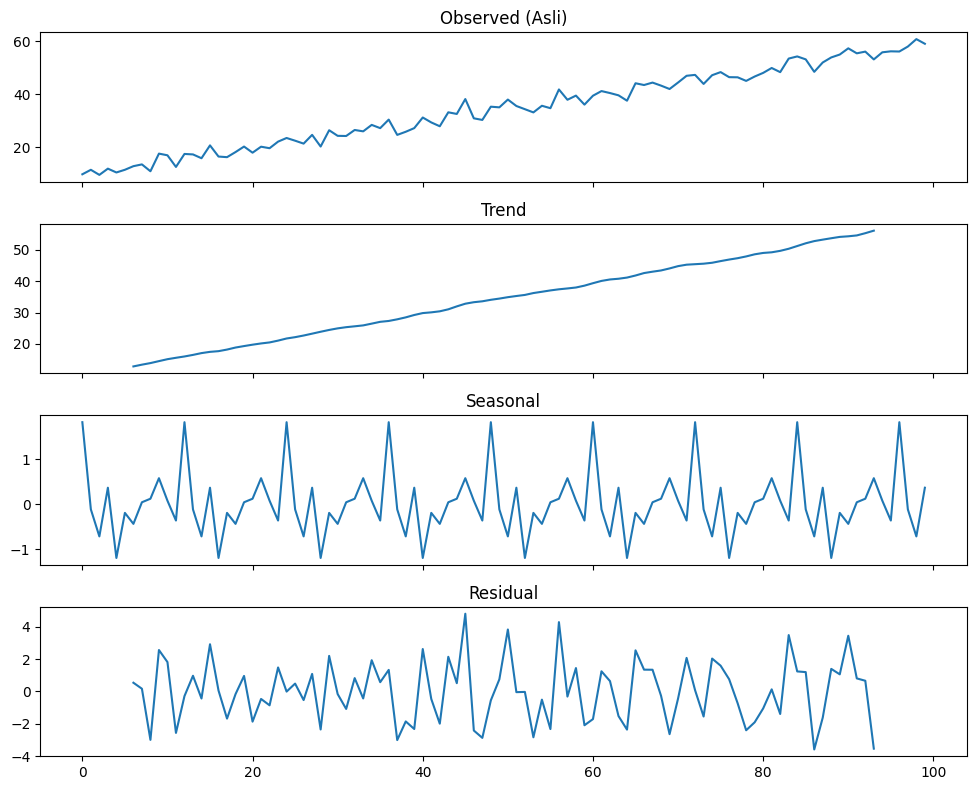

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=axes[0], title='Observed (Asli)')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()

Bagaimana interpretasi hasil dekomposisi deret tersebut?

In [ ]:
# Melakukan dekomposisi untuk deret simulasi kecenderungan linear dan musiman
from statsmodels.tsa.seasonal import seasonal_decompose
result_mix = seasonal_decompose(df_mix['Value'], model='additive', period=12)

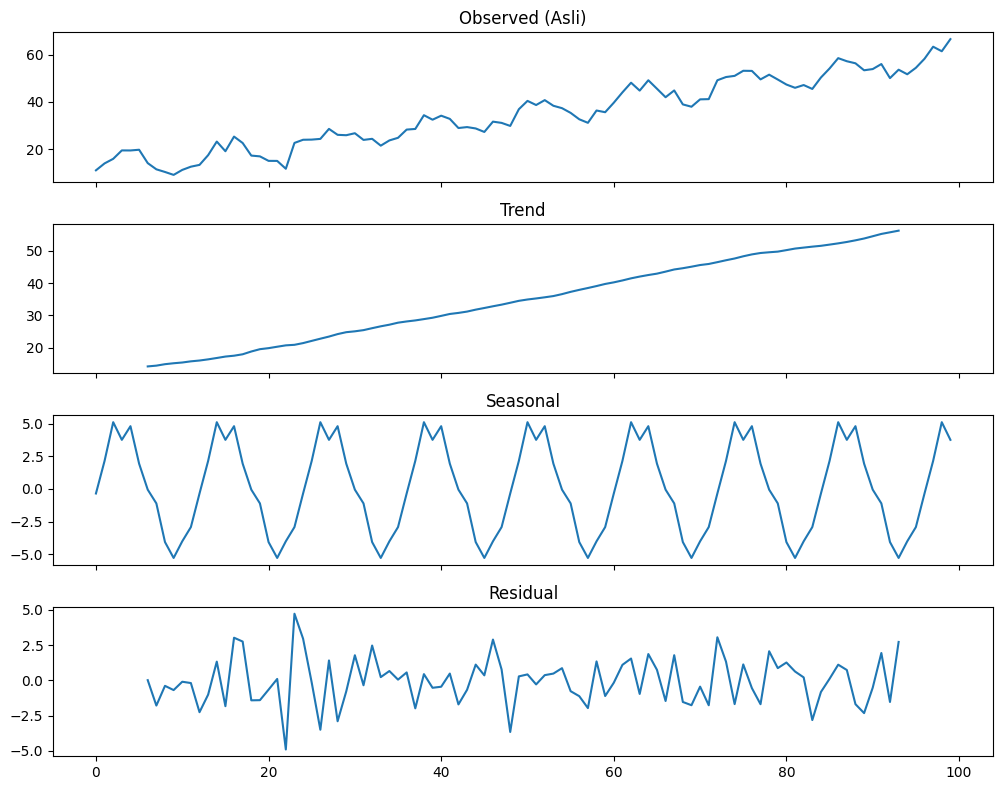

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result_mix.observed.plot(ax=axes[0], title='Observed (Asli)')
result_mix.trend.plot(ax=axes[1], title='Trend')
result_mix.seasonal.plot(ax=axes[2], title='Seasonal')
result_mix.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()


Bagaimana interpretasi hasil dekomposisi deret tersebut?

Ketika melakukan dekoposisi deret, perlu diperhatikan bahwa terdapat 2 jenis model untuk dekomposisi, yaitu model `Aditif` dan `multiplikatif`.

- Model `aditif` digunakan jika ragam deret relatif konstan atau kecil

- Model `multiplikatif` digunakan jika ragam deret besar

In [ ]:
# ilustrasi untuk deret multiplikatif
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Komponen trend linear
a, b = 0.05, 10 #(intersep dan slope)
trend = a * x + b

# Komponen musiman (sinusoidal)
seasonality = 1+ 0.5 * np.sin(2 * np.pi * x / 12)

# Noise acak
noise = np.random.normal(scale=0.2, size=n)

# Gabungan semua komponen
series_multi = trend*seasonality + noise

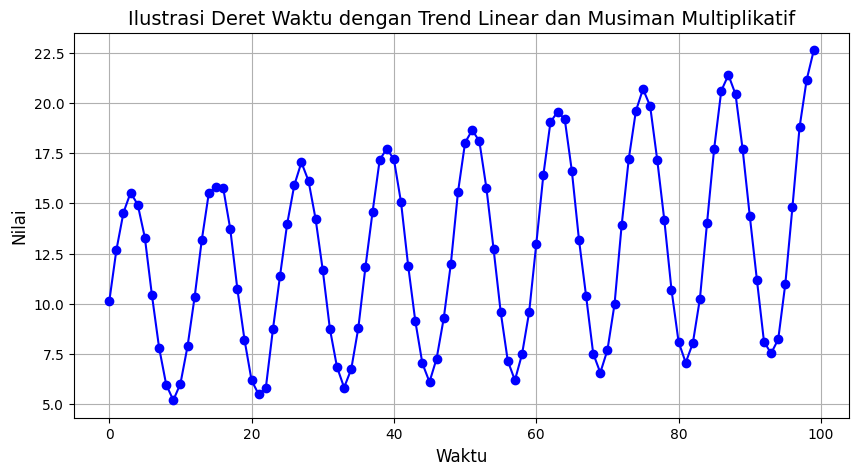

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, series_multi, color='b', marker='o')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu dengan Trend Linear dan Musiman Multiplikatif', fontsize=14)
plt.grid()
plt.show()

Dekomposisi dengan model multiplikatif hanya bisa dilakukan untuk deret dengan nilai >0, sehingga jika deret memiliki nilai 0 atau negatif maka deret perlu ditransformasi.

In [ ]:
#  Dekomposisi dengan model multiplikatif
# mengubah data menjadi format dataframe
df_multi = pd.DataFrame(series_multi, columns=['Value'])

from statsmodels.tsa.seasonal import seasonal_decompose
result_multi = seasonal_decompose(df_multi['Value'], model='multiplicative', period=12)

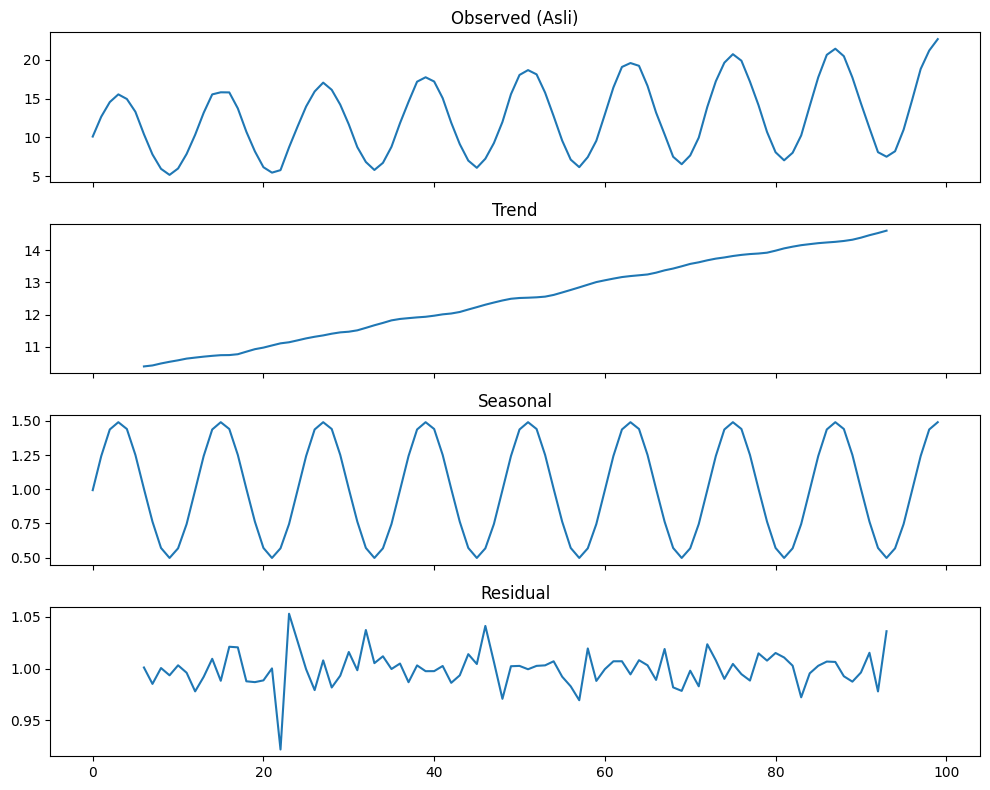

In [ ]:
# Plot hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_multi.observed.plot(ax=axes[0], title='Observed (Asli)')
result_multi.trend.plot(ax=axes[1], title='Trend')
result_multi.seasonal.plot(ax=axes[2], title='Seasonal')
result_multi.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()

In [ ]:
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Hanya noise acak tanpa trend atau musiman
noise = np.random.normal(loc=10, scale=2, size=n)  # Nilai acak sekitar 10

# Buat DataFrame untuk regresi
df = pd.DataFrame({'Time': x, 'Series': noise})
df['Time'] = pd.to_datetime(df['Time'], unit='D')  # Konversi ke format waktu
df.set_index('Time', inplace=True)

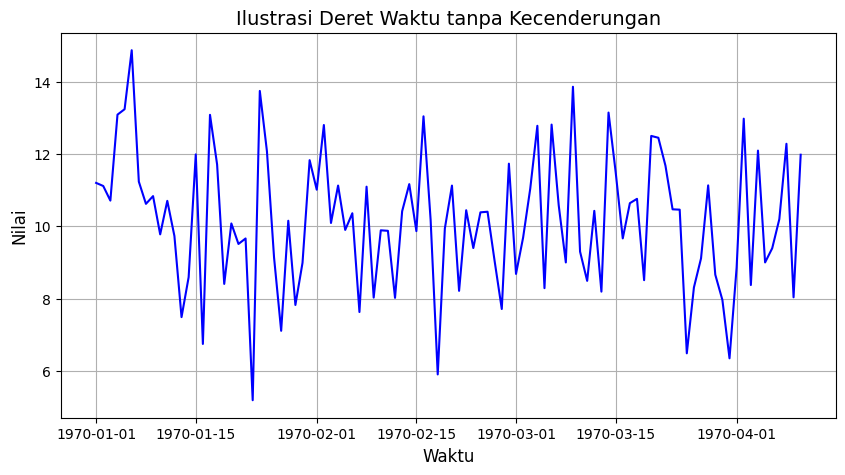

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Series'], color='b')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu tanpa Kecenderungan', fontsize=14)
plt.grid()
plt.show()

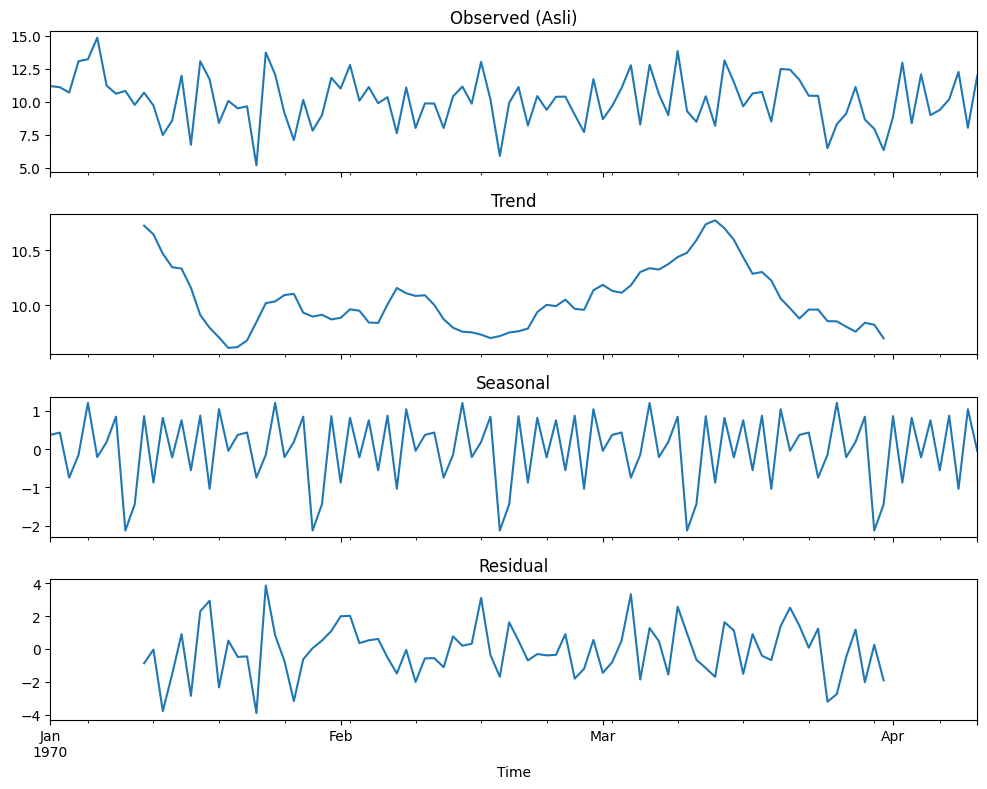

In [ ]:
# Lakukan dekomposisi dengan model aditif
result = seasonal_decompose(df['Series'], model='additive', period=20)

# Plot hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=axes[0], title='Observed (Asli)')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()